# Sky-anisotropy tutorial

In [1]:
import sky_anisotropy as sa
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
nside = 64
npix = hp.nside2npix(nside)

In [3]:
values = np.random.randn(npix)
pix = np.arange(npix)

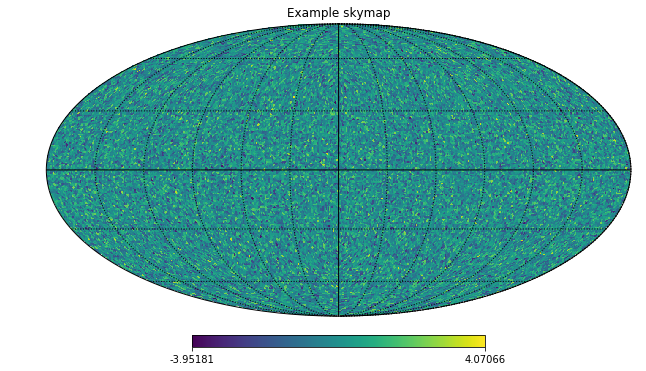

In [4]:
hp.mollview(values, title='Example skymap')
hp.graticule(verbose=False)

## On regions

Two types of on regions are currently supported:

- Disc &mdash; circular region on the sky
- Square &mdash; square region on the sky

Each of these has a corresponding function in `sky_anisotropy`. 

Let's start by picking a healpy pixel to center our example on regions on. Here we'll choose to center the on regions at $\mathrm{(theta, phi) = (60^{\circ}, 70^{\circ})}$.

In [5]:
theta, phi = np.deg2rad(60), np.deg2rad(70)
pix_center = hp.ang2pix(nside, theta, phi)
pix_center

12209

We'll also choose the size of our on regions to be $\mathrm{10^{\circ}}$. 

In [6]:
size = np.deg2rad(10)

### Disc on region

In [7]:
disc_on_region_mask = sa.disc_on_region(pix, pix_center, size=size, nside=nside)

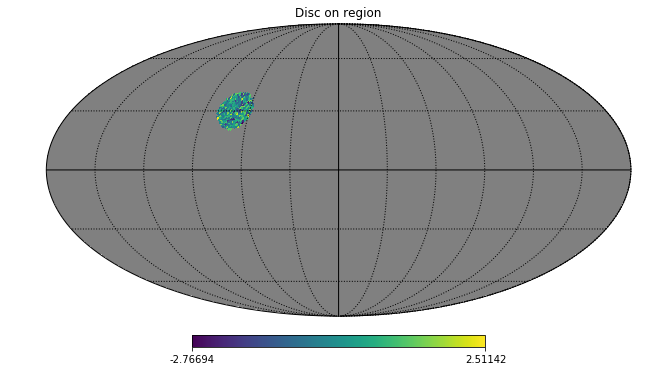

In [8]:
disc_on_region = values.copy()
disc_on_region[~disc_on_region_mask] = hp.UNSEEN
hp.mollview(disc_on_region, title='Disc on region')
hp.graticule(verbose=False)

### Square on region

In [9]:
square_on_region_mask = sa.square_on_region(pix, pix_center, size=size, nside=nside)

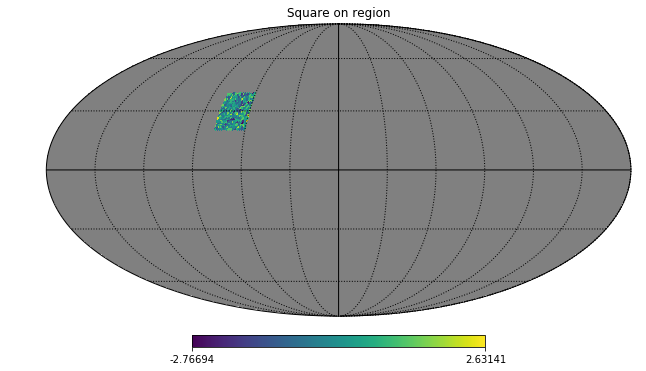

In [10]:
square_on_region = values.copy()
square_on_region[~square_on_region_mask] = hp.UNSEEN
hp.mollview(square_on_region, title='Square on region')
hp.graticule(verbose=False)

## Off regions

Three types of off regions are currently supported:

- All-sky &mdash; all pixels that aren't in the on region
- Theta band &mdash; all pixels that aren't in the on region and are within the the same theta range as the on region
- Opposite &mdash; $\mathrm{180^{\circ}}$ rotation in phi of the on region 

Each of these has a corresponding function in `sky_anisotropy`.

### All-sky off region

In [11]:
allsky_off_region_mask = sa.allsky_off_region(pix, pix_center, disc_on_region_mask, nside=nside)

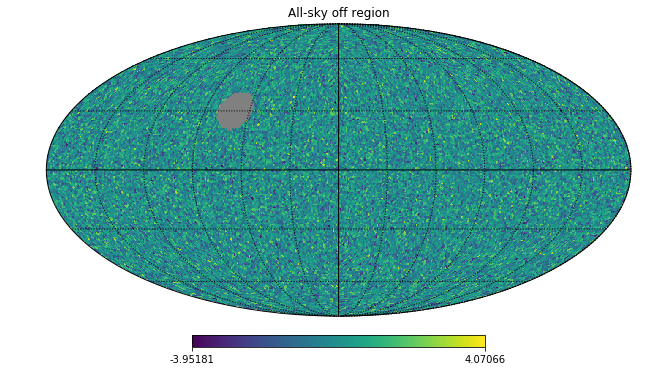

In [12]:
all_sky_off_region = values.copy()
all_sky_off_region[~allsky_off_region_mask] = hp.UNSEEN
hp.mollview(all_sky_off_region, title='All-sky off region')
hp.graticule(verbose=False)

### Theta band off region

In [13]:
theat_band_off_region_mask = sa.theta_band_off_region(pix, pix_center, disc_on_region_mask, nside=nside)

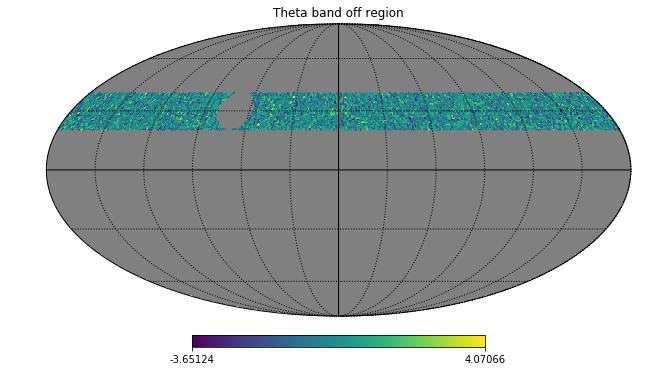

In [14]:
theta_band_off_region = values.copy()
theta_band_off_region[~theat_band_off_region_mask] = hp.UNSEEN
hp.mollview(theta_band_off_region, title='Theta band off region')
hp.graticule(verbose=False)

### Opposite off region

In [15]:
opposite_off_region_mask = sa.opposite_off_region(pix, pix_center, disc_on_region_mask, nside=nside)

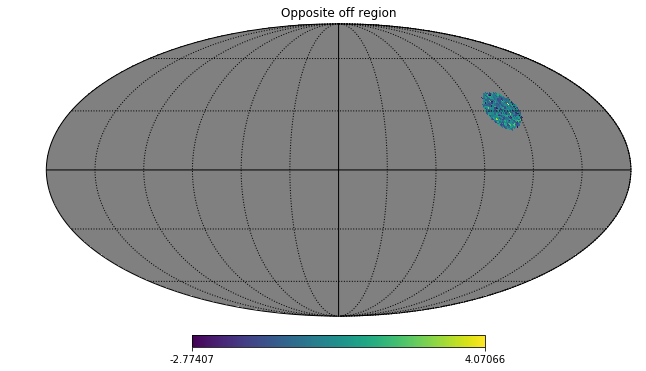

In [16]:
opposite_off_region = values.copy()
opposite_off_region[~opposite_off_region_mask] = hp.UNSEEN
hp.mollview(opposite_off_region, title='Opposite off region')
hp.graticule(verbose=False)

## On-off region $\mathrm{\chi^2}$ comparisons

In [17]:
results = sa.on_off_chi_squared(values, pix, pix_center=pix[:10000], on_region='disc',
                                size=size, off_region='allsky', nside=64,
                                bins=np.linspace(-2, 2, 10), n_jobs=3)

Calculating chi-squared values for 10000 regions
[########################################] | 100% Completed | 47.4s
[########################################] | 100% Completed |  0.1s


In [18]:
results.head()

,alpha,chi2,num_on,pix_center,pval,sig
0,0.007649,7.871835,356,0,0.547112,-0.118368
1,0.007628,7.772194,355,1,0.557257,-0.144017
2,0.007628,11.783302,355,2,0.225803,0.752740
3,0.007649,8.490447,356,3,0.485573,0.036170
4,0.007628,6.433137,355,4,0.695907,-0.512663


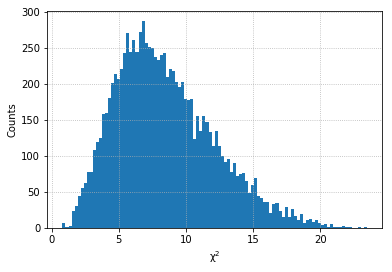

In [19]:
fig, ax = plt.subplots()
results['chi2'].plot(kind='hist', bins=100, ax=ax)
ax.set_xlabel('$\mathrm{\chi^2}$')
ax.set_ylabel('Counts')
ax.grid(ls=':')
plt.show()